# 线性关系可视化

许多数据集包含多定量变量，并且分析的目的通常是将这些变量联系起来。我们[之前讨论](#/docs/5)可以通过显示两个变量相关性的来实现此目的的函数。但是，使用统计模型来估计两组噪声观察量之间的简单关系可能会非常有效。本章讨论的函数将通过线性回归的通用框架实现。

本着图凯(Tukey)精神，seaborn 中的回归图主要用于添加视觉指南，以助于在探索性数据分析中强调存在于数据集的模式。换而言之，seaborn 本身不是为统计分析而生。要获得与回归模型拟合相关定量度量，你应当使用 [statsmodels](https://www.statsmodels.org/). 然而，seaborn 的目标是通过可视化快速简便地 3 探索数据集，因为这样做，如果说不上更，是与通过统计表探索数据集一样重要。

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sns.set(color_codes=True)

In [3]:
tips = sns.load_dataset("tips")

## 绘制线性回归模型的函数

seaborn 中两个主要函数主要用于显示回归确定的线性关系。这些函数，[`regplot()`](../generated/seaborn.regplot.html＃seaborn.regplot"seaborn.regplot") 和 [`lmplot()`](../generated/seaborn.lmplot.html＃seaborn.lmplot"seaborn.lmplot")， 之间密切关联，并且共享核心功能。但是，了解它们的不同之处非常重要，这样你就可以快速为特定工作选择正确的工具。

在最简单的调用中，两个函数都绘制了两个变量，`x`和`y`，然后拟合回归模型`y~x`并绘制得到回归线和该回归的 95%置信区间：

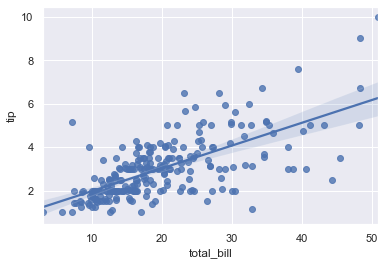

In [4]:
sns.regplot(x="total_bill", y="tip", data=tips);

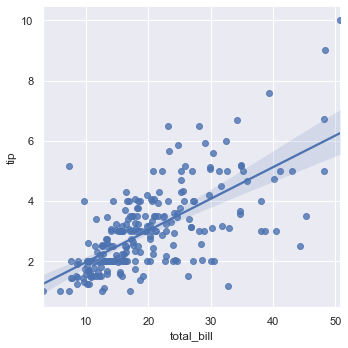

In [5]:
sns.lmplot(x="total_bill", y="tip", data=tips);

你应当注意到，除了图形形状不同，两幅结果图是完全一致的。我们会在后面解释原因。目前，要了解的另一个主要区别是[`regplot()`](../generated/seaborn.regplot.html＃seaborn.regplot"seaborn.regplot")接受多种格式的`x`和`y`变量，包括简单的 numpy 数组，pandas `Series`对象，或者作为对传递给`data`的 pandas `DataFrame`对象。相反，[`lmplot()`](../generated/seaborn.lmplot.html＃seaborn.lmplot"seaborn.lmplot")将`data`作为必须参数，`x`和`y`变量必须被指定为字符串。这种数据格式被称为"长格式"或["整齐"](https://vita.had.co.nz/papers/tidy-data.pdf)数据。 除了这种输入的灵活性之外，[`regplot()`](../ generated / seaborn.regplot.html＃seaborn.regplot"seaborn.regplot")拥有[`lmplot()`](../generated/seaborn.lmplot.html＃seaborn.lmplot"seaborn.lmplot")一个子集的功能，所以我们将使用后者来演示它们。

当其中一个变量采用离散值时，可以拟合线性回归。但是，这种数据集生成的简单散点图通常不是最优的：

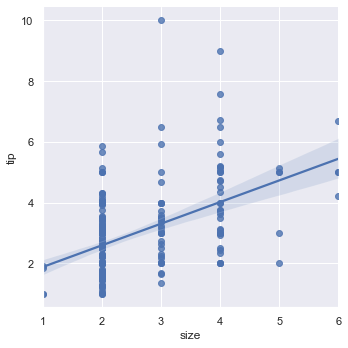

In [6]:
sns.lmplot(x="size", y="tip", data=tips);

一种选择是向离散值添加随机噪声("抖动")，以使这些值分布更清晰。需要注意的是，抖动仅用于散点图数据，而不会影响回归线本身拟合：

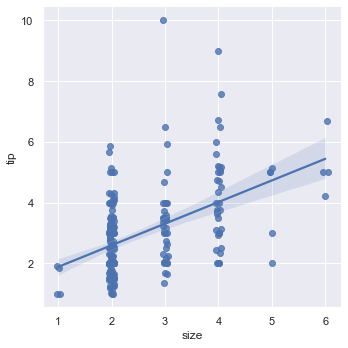

In [7]:
sns.lmplot(x="size", y="tip", data=tips, x_jitter=.05);

第二种选择是综合每个离散箱中的观测值，以绘制集中趋势的估计值和置信区间：

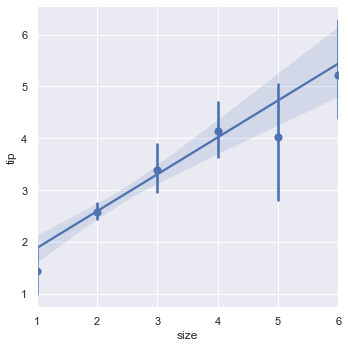

In [8]:
sns.lmplot(x="size", y="tip", data=tips, x_estimator=np.mean);

## 拟合不同模型

上面使用的简单线性回归模型非常容易拟合，但是它不适合某些类型的数据集。[Anscombe 的四重奏](https://en.wikipedia.org/wiki/Anscombe%27s_quartet)数据集展示了一些实例，其中简单线性回归提供了相同的关系估计，然而简单的视觉检查清楚地显示了差异。例如，在第一种情况下，线性回归是一个很好的模型：

In [9]:
anscombe = sns.load_dataset("anscombe")

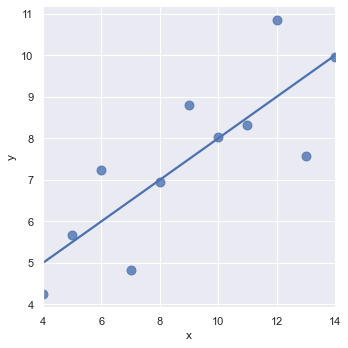

In [10]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
           ci=None, scatter_kws={"s": 80});

第二个数据集的线性关系是相同的，但是图表清楚地表明这并不是一个好的模型：

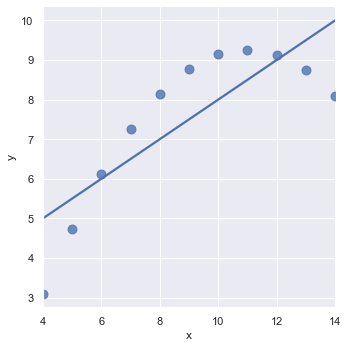

In [11]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           ci=None, scatter_kws={"s": 80});

在这些存在高阶关系的情况下，[`regplot()`](../generated/seaborn.regplot.html＃seaborn.regplot"seaborn.regplot")和[`lmplot()`](./generated/seaborn.regplot.html#seaborn.regplot"seaborn.regplot")可以拟合多项式回归模型来探索数据集中的简单非线性趋势：

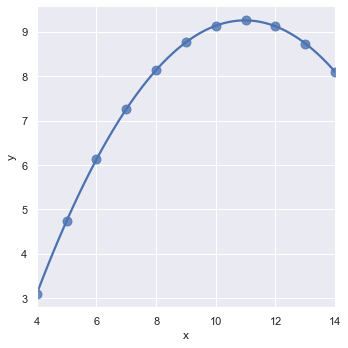

In [12]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
           order=2, ci=None, scatter_kws={"s": 80});

"离群值"观察引起的另一个问题是，除了研究中的主要关系之外，由于某种原因导致的偏离：

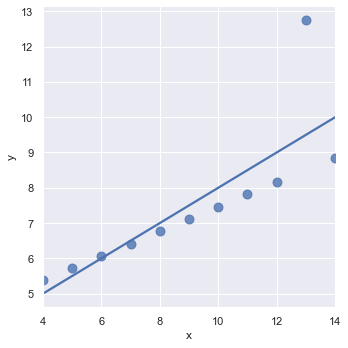

In [13]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           ci=None, scatter_kws={"s": 80});

在存在异常值的情况下，拟合稳健回归可能会很有用，该回归使用了一种不同的损失函数来降低相对较大的残差的权重：

ModuleNotFoundError: No module named 'statsmodels'

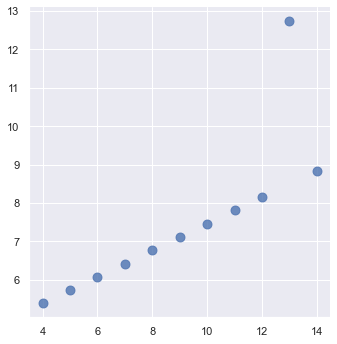

In [14]:
sns.lmplot(x="x", y="y", data=anscombe.query("dataset == 'III'"),
           robust=True, ci=None, scatter_kws={"s": 80});

当`y`变量是二进制时，简单线性回归也"有效"，但提供了难以置信的预测：

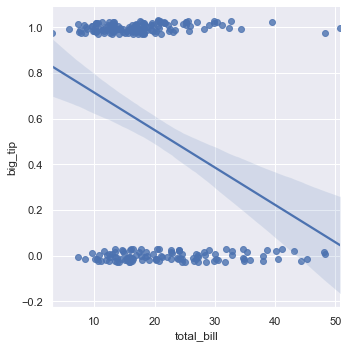

In [15]:
tips["big_tip"] = (tips.tip / tips.total_bill) > .15
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           y_jitter=.03);

在这种情况下的解决方案是拟合逻辑回归，使得回归线对给定值`x`显示的估计概率`y=1`。

ModuleNotFoundError: No module named 'statsmodels'

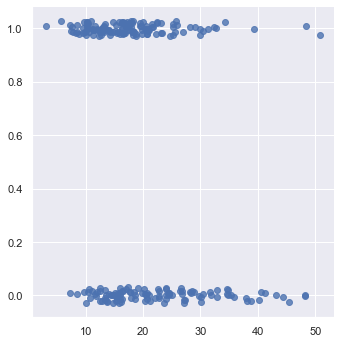

In [16]:
sns.lmplot(x="total_bill", y="big_tip", data=tips,
           logistic=True, y_jitter=.03);

请注意，逻辑回归估计比简单回归计算密集程度更高(稳健回归也是如此)，并且由于回归线周围的置信区间是使用自举程度计算，你可能希望关闭它来达到更快的迭代(使用ci=None)。

一种完全不同的方法是使用lowess smoother拟合非参数回归。尽管它是计算密集型的，这种方法的假设最少，因此目前置信区间根本没有计算：

ModuleNotFoundError: No module named 'statsmodels'

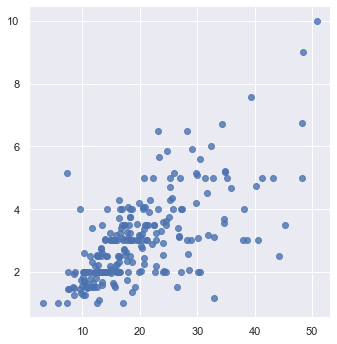

In [17]:
sns.lmplot(x="total_bill", y="tip", data=tips,
           lowess=True);

[`residplot()`](../generated/seaborn.residplot.html#seaborn.residplot "seaborn.residplot") 函数可以用作检查简单回归模型是否适合数据集的有效工具。它拟合并删除简单的线性回归，然后绘制每个观察值的残差值。理想情况下，这些值应随机散步在`y=0`周围：

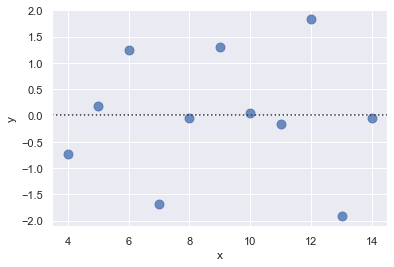

In [18]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'I'"),
              scatter_kws={"s": 80});

如果残差中存在结构形状，则表明简单的线性回归不合适：

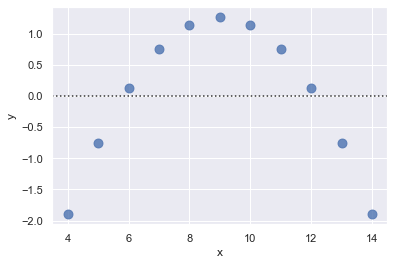

In [19]:
sns.residplot(x="x", y="y", data=anscombe.query("dataset == 'II'"),
              scatter_kws={"s": 80});

## 其他变量关系

 上面的图显示了探索一对变量之间关系的许多方法。然而，通常，一个更有趣的问题是"这两个变量之间的关系如何随第三个变量的变化而变化？"这就是[`regplot()`](../generated/seaborn.regplot.html#seaborn.regplot "seaborn.regplot")和[`lmplot()`](../generated/seaborn.lmplot.html#seaborn.lmplot "seaborn.lmplot")的区别所在。[`regplot()`](../generated/seaborn.regplot.html#seaborn.regplot "seaborn.regplot")总是表现单一关系, [`lmplot()`](../generated/seaborn.lmplot.html#seaborn.lmplot "seaborn.lmplot")把[`regplot()`](../generated/seaborn.regplot.html#seaborn.regplot "seaborn.regplot")和 [`FacetGrid`](../generated/seaborn.FacetGrid.html#seaborn.FacetGrid "seaborn.FacetGrid")结合，以提供一个简单的界面，显示"facet"图的线性回归，使你可以探索与最多三个其他分类变量的交互。

分离关系的最佳方法是在同一轴上绘制两个级别并使用颜色来区分它们：

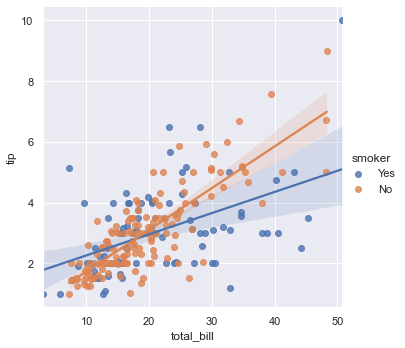

In [20]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips);

除了颜色之外，还可以使用不同的散点图标记来使绘图更好地再现为黑白。你还可以完全控制使用的颜色：

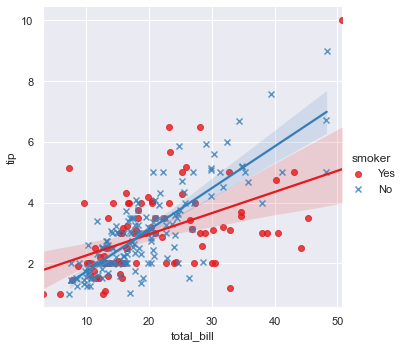

In [21]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", data=tips,
           markers=["o", "x"], palette="Set1");

要添加另一个变量，你可以绘制多个"facet"，其中每个级别的变量出现在网络的行或列中：

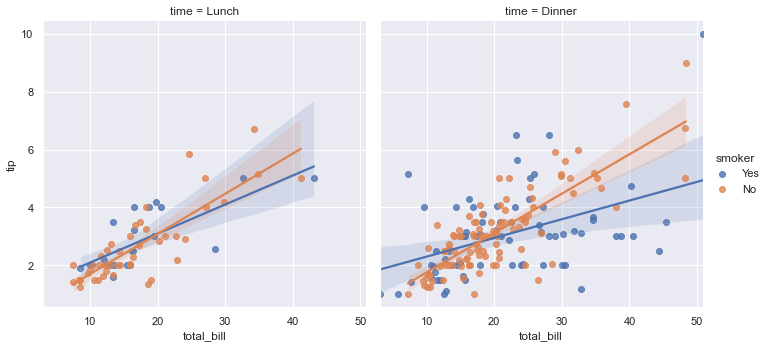

In [22]:
sns.lmplot(x="total_bill", y="tip", hue="smoker", col="time", data=tips);

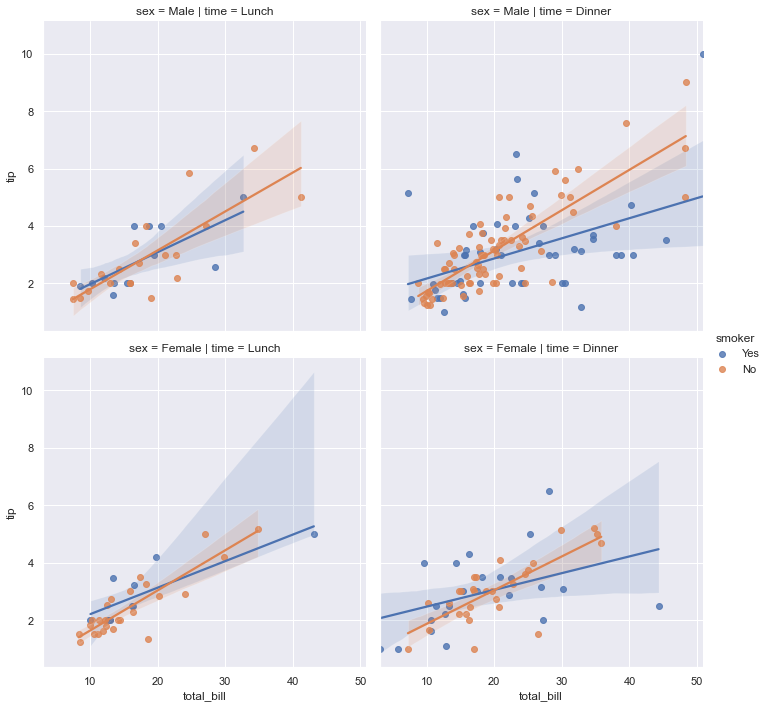

In [23]:
sns.lmplot(x="total_bill", y="tip", hue="smoker",
           col="time", row="sex", data=tips);

## 控制绘图的大小和形状

在之前，我们注意到[`regplot()`](../generated/seaborn.regplot.html#seaborn.regplot "seaborn.regplot")和[`lmplot()`](../generated/seaborn.lmplot.html#seaborn.lmplot "seaborn.lmplot")生成的默认图看起来相同，但却具有不同的大小和形状。这是因为[`regplot()`](../generated/seaborn.regplot.html#seaborn.regplot "seaborn.regplot")是一个"轴级"函数，它绘制在特定的轴上。这意味着你可以自己制作多面板图形并精确控制回归图的位置。如果没有明确提供轴对象，它只使用"当前活动"轴，这就是默认绘图与大多数其他 matplotlib 函数具有相同大小和形状的原因。要控制大小，你需要自己创建一个图形对象。

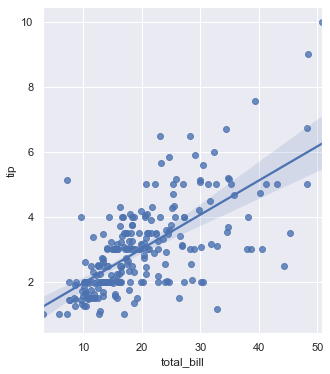

In [24]:
f, ax = plt.subplots(figsize=(5, 6))
sns.regplot(x="total_bill", y="tip", data=tips, ax=ax);

相比之下，[`lmplot()`](../generated/seaborn.lmplot.html#seaborn.lmplot "seaborn.lmplot")图的大小和形状是通过[`lmplot()`](http://typora-app/generated/seaborn.lmplot.html#seaborn.lmplot)接口，使用`size`和`aspect`参数控制，这些参数适用于绘图中的每个`facet`，而不是整个图形本身：

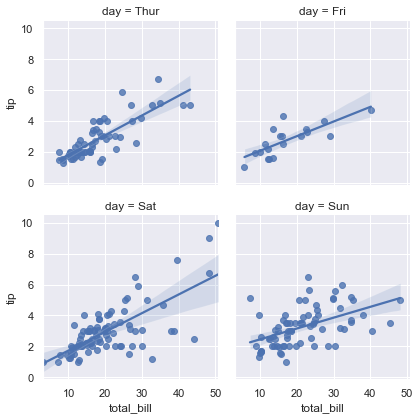

In [25]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           col_wrap=2, height=3);

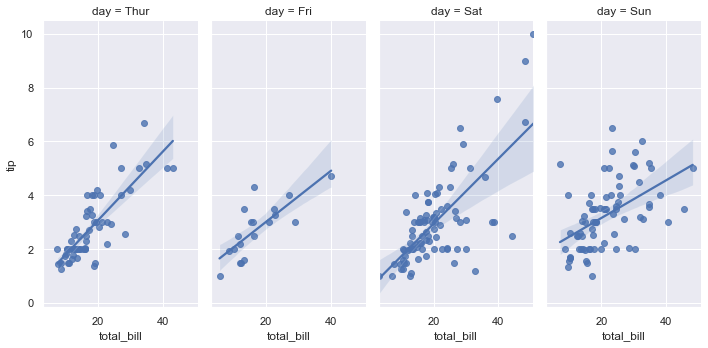

In [26]:
sns.lmplot(x="total_bill", y="tip", col="day", data=tips,
           aspect=.5);

## 在其他情境中绘制回归

其他一些 seaborn 函数在更大，更复杂的图中使用[`regplot()`](../generated/seaborn.regplot.html#seaborn.regplot "seaborn.regplot")。第一个是我们在[发行教程](distributions.html#distribution-tutorial)中引入的[`jointplot()`](../generated/seaborn.jointplot.html#seaborn.jointplot "seaborn.jointplot")。除了前面讨论的绘制风格，[`jointplot()`](../generated/seaborn.jointplot.html#seaborn.jointplot "seaborn.jointplot") 可以使用[`regplot()`](../generated/seaborn.regplot.html#seaborn.regplot "seaborn.regplot")通过传递`kind="reg"`来显示轴上的线性回归拟合：

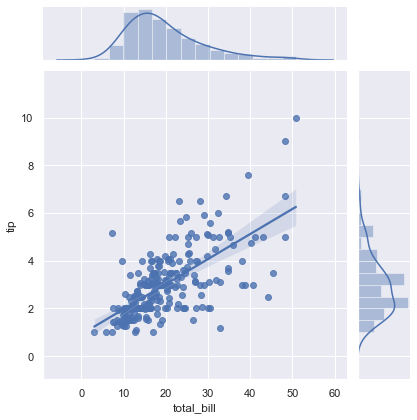

In [27]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg");

使用[`pairplot()`](../generated/seaborn.pairplot.html#seaborn.pairplot "seaborn.pairplot")函数与`kind="reg"`将 [`regplot()`](../generated/seaborn.regplot.html#seaborn.regplot "seaborn.regplot")和[`PairGrid`](../generated/seaborn.PairGrid.html#seaborn.PairGrid "seaborn.PairGrid") 结合起来，来显示数据集中变量的线性关系。请注意这与[`lmplot()`](../generated/seaborn.lmplot.html#seaborn.lmplot "seaborn.lmplot")的不同之处。在下图中，两个轴在第三变量上的两个级别上没有显示相同的关系；相反，[`PairGrid()`](../generated/seaborn.PairGrid.html#seaborn.PairGrid "seaborn.PairGrid")用于显示数据集中变量的不同配对之间的多个关系。

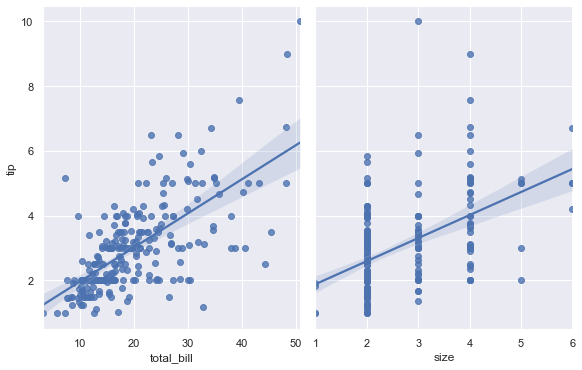

In [28]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             height=5, aspect=.8, kind="reg");

像[`lmplot()`](../generated/seaborn.lmplot.html#seaborn.lmplot "seaborn.lmplot")，但不像[`jointplot()`](../generated/seaborn.jointplot.html#seaborn.jointplot "seaborn.jointplot")，额外的分类变量调节是通过`hue`参数内置在函数[`pairplot()`](../generated/seaborn.pairplot.html#seaborn.pairplot "seaborn.pairplot")中：

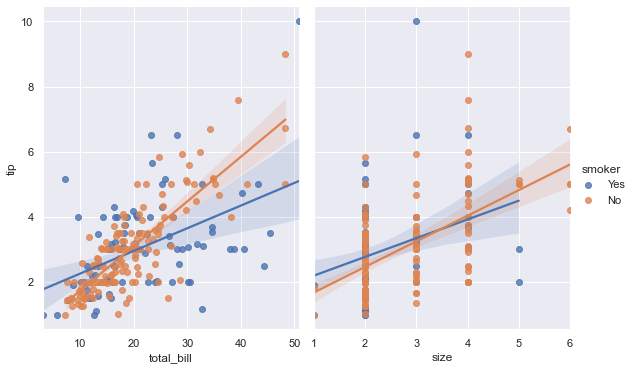

In [29]:
sns.pairplot(tips, x_vars=["total_bill", "size"], y_vars=["tip"],
             hue="smoker", height=5, aspect=.8, kind="reg");